# Proyecto Final

## Programación

## Profesor: Ing. Andrés Mena A.

### **Nombre del estudiante: Stephanny Garita Vega**

### **Objetivo principal:**

“Analizar el comportamiento inicial de los prospectos ingresados durante la campaña del IIIQ 2025, identificando tendencias en fecha de ingreso, carreras de interés, origen de captación, base académica y estado del prospecto, con el fin de comprender mejor el perfil de los leads y orientar estrategias de marketing y seguimiento.”

Con esto podemos analizar:

✔ Qué carreras tienen más interés
✔ Qué canal trae más prospectos
✔ Cuántos prospectos llegan por día / semana
✔ Distribución por nivel académico
✔ Prospectos trabajados, contactados, convertidos
✔ Tendencias de ingreso

In [ ]:
pip install pandas openpyxl numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import locale

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'es_MX.UTF-8')
        except locale.Error:
            print("Advertencia: No se pudo establecer el locale a español. Los días pueden estar en inglés.")

df = pd.read_excel("prospectos.xlsx")
display(df.head())

,Fecha_ingreso,Nombre,Estatus,Contador,Origen,Etapa,Carrera_interés,Fecha_modificado,Base,Grado_académico
0,2025-09-30 20:22:35,Alexander,WhatsApp (CONTACTO 3),4,Página Castro Carazo,Contactado,Técnico en Gestión de Proyectos,2025-10-27 14:46:36,Nuevo IIIQ,Técnicos
1,2025-09-30 16:09:23,Brandon Araya,Registro Duplicado(*),1,Página Castro Carazo,Registro Duplicado(*),Cisco (CCNA),2025-10-01 10:51:38,Nuevo IIIQ,Técnicos
2,2025-09-30 13:56:59,Nayarith,Registro Duplicado(*),2,Página Castro Carazo,Registro Duplicado(*),Técnico en Marketing Digital,2025-10-01 10:46:18,Nuevo IIIQ,Técnicos
3,2025-09-30 12:54:05,Mel,Llamar luego,3,WhatsApp - WA Nuevos,Contactado,NaN,2025-10-17 15:27:58,Nuevo IIIQ,Técnicos
4,2025-09-30 11:32:51,Anfony Sánchez Barquero,Registro Duplicado(*),1,Página Castro Carazo,Registro Duplicado(*),Técnico Contabilidad,2025-09-30 13:41:27,Nuevo IIIQ,Técnicos


Limpieza básica del archivo

In [17]:
# Eliminar espacios en columnas
df.columns = df.columns.str.strip()

# Remplazar strings vacíos o "nan"
df = df.replace([" ", ""], pd.NA)

# Eliminar duplicados
df = df.drop_duplicates()

#Agregar eliminar etapar duplicados

# Convertir fechas correctamente
df["Fecha_ingreso"] = pd.to_datetime(df["Fecha_ingreso"], errors="coerce")
df["Fecha_modificado"] = pd.to_datetime(df["Fecha_modificado"], errors="coerce")

Se identifican valores faltantes:

In [18]:
print(df.isnull().sum())

Fecha_ingreso         0
Nombre                0
Estatus               0
Contador              0
Origen                0
Etapa                 0
Carrera_interés     250
Fecha_modificado      0
Base                  0
Grado_académico       0
dtype: int64


Se cuenta la cantidad de leads:

In [19]:
print("Total de leads:", len(df))


Total de leads: 1803


Se identifica la cantidad de leads que ingresaron según el origen:

In [20]:
print(df["Origen"].value_counts())

Origen
Página Castro Carazo       578
Formulario Web Facebook    509
Formulario Web Google      285
WhatsApp - WA Nuevos       244
Formulario Web             110
Sin Especificar             47
Facebook                    27
Walk In                      2
Instagram                    1
Name: count, dtype: int64


Se identifica la cantidad de leads que ingresaron según la carrera de interés:

In [21]:
print(df["Carrera_interés"].value_counts())

Carrera_interés
Cisco (CCNA)                                                           206
Técnico en Análisis de Datos                                           120
Bachillerato Contaduría                                                106
Técnico Contabilidad                                                   104
Licenciatura en Docencia                                                80
Técnico Ciber Seguridad                                                 80
Bachillerato Derecho                                                    58
Técnico en Marketing Digital                                            56
Bachillerato Administración con Énfasis en Recursos Humanos             54
Técnico en Control de Calidad                                           45
Curso Libre Inglés                                                      44
Bachillerato Administración de Aduanas                                  38
Técnico Ciberseguridad 2.0                                              38
Bachiller

Se identifica la cantidad de leads que ingresan según la fecha de ingreso:

In [37]:
# Crear columnas para Año, Mes y Semana
df['Año'] = df['Fecha_ingreso'].dt.year
df['Mes_Num'] = df['Fecha_ingreso'].dt.month_name()  
df['Semana'] = df['Fecha_ingreso'].dt.isocalendar().week.astype(int)
df['Dia_Semana'] = df['Fecha_ingreso'].dt.day_name()
df['Hora'] = df['Fecha_ingreso'].dt.hour

leads_por_mes_anual = df.groupby(['Año', 'Mes']).size().reset_index(name='Total_Leads')

print("\n--- Total de Leads por Año y Mes ---") 
display(leads_por_mes_anual)

leads_por_dia_hora = df.groupby(['Dia_Semana', 'Hora']).size().reset_index(name='Total_Leads')
orden_dias = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
leads_por_dia_hora['Dia_Semera'] = pd.Categorical(leads_por_dia_hora['Dia_Semana'], categories=orden_dias, ordered=True)
leads_por_dia_hora = leads_por_dia_hora.sort_values(['Dia_Semana', 'Hora'])

print("\n📊 **Tabla de Leads Agrupados por Día y Hora:**")
display(leads_por_dia_hora.head(10)) # Mostramos las primeras 10 filas




--- Total de Leads por Año y Mes ---


,Año,Mes,Total_Leads
0,2025,August,744
1,2025,July,704
2,2025,June,37
3,2025,September,318



📊 **Tabla de Leads Agrupados por Día y Hora:**


,Dia_Semana,Hora,Total_Leads,Dia_Semera
0,Friday,0,5,NaN
1,Friday,1,3,NaN
2,Friday,4,3,NaN
3,Friday,5,5,NaN
4,Friday,6,5,NaN
5,Friday,7,7,NaN
6,Friday,8,10,NaN
7,Friday,9,21,NaN
8,Friday,10,10,NaN
9,Friday,11,16,NaN


Gráfico de Tendencia de cantidad de leads según origen:

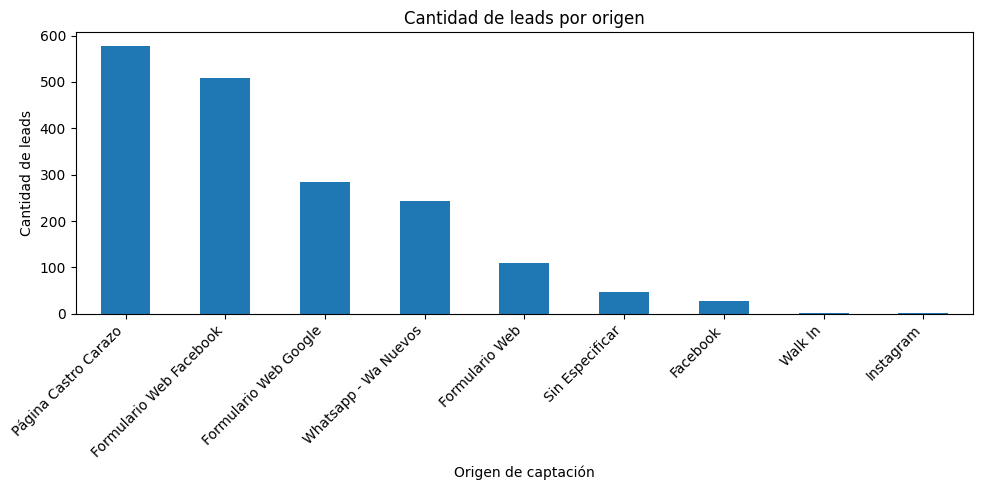

In [23]:
import matplotlib.pyplot as plt

# Limpiar la columna Origen (recomendado)
df["Origen"] = df["Origen"].astype(str).str.strip().str.title()
df["Origen"] = df["Origen"].replace(["", "Nan", "Na"], "Desconocido")

# Contar leads por origen
conteo_origen = df["Origen"].value_counts()

# Graficar
plt.figure(figsize=(10,5))
conteo_origen.plot(kind="bar")

plt.title("Cantidad de leads por origen")
plt.xlabel("Origen de captación")
plt.ylabel("Cantidad de leads")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

Gráfico de la tendencia de cantidad de ingresos de leads por fecha:

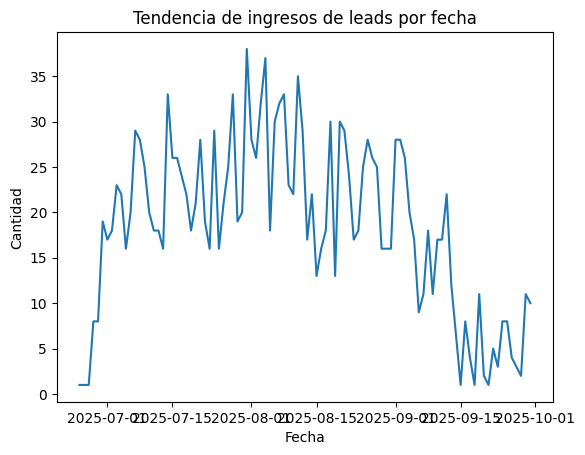

In [24]:
import matplotlib.pyplot as plt

df.groupby(df["Fecha_ingreso"].dt.date).size().plot(kind="line")
plt.title("Tendencia de ingresos de leads por fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.show()